<a href="https://colab.research.google.com/github/Ozoswita15/Ozoswita15/blob/main/PCA_ROI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

def download_nsd_data(subject, session, save_path="/content"):
    """
    Downloads the fMRI beta data for a given subject and session from the NSD dataset.

    Parameters:
    - subject (int): Subject number (e.g., 1 for subj01).
    - session (int): Session number (e.g., 1 for session01).
    - save_path (str): Directory where the files will be saved.

    Returns:
    - file_path (str): Path of the downloaded file.
    """
    subj_str = f"subj{subject:02d}"
    session_str = f"session{session:02d}"

    url = f"https://natural-scenes-dataset.s3.amazonaws.com/nsddata_betas/ppdata/{subj_str}/func1pt8mm/betas_fithrf_GLMdenoise_RR/betas_{session_str}.nii.gz"
    file_path = os.path.join(save_path, f"betas_{session_str}.nii.gz")

    # Run wget command to download the file
    os.system(f"wget -q -O {file_path} {url}")

    print(f"Downloaded {file_path}")
    return file_path

# Example usage:
for i in range(1,41):
  download_nsd_data(subject=1, session=i)

Downloaded /content/betas_session01.nii.gz
Downloaded /content/betas_session02.nii.gz
Downloaded /content/betas_session03.nii.gz
Downloaded /content/betas_session04.nii.gz
Downloaded /content/betas_session05.nii.gz
Downloaded /content/betas_session06.nii.gz
Downloaded /content/betas_session07.nii.gz
Downloaded /content/betas_session08.nii.gz
Downloaded /content/betas_session09.nii.gz
Downloaded /content/betas_session10.nii.gz
Downloaded /content/betas_session11.nii.gz
Downloaded /content/betas_session12.nii.gz
Downloaded /content/betas_session13.nii.gz
Downloaded /content/betas_session14.nii.gz
Downloaded /content/betas_session15.nii.gz
Downloaded /content/betas_session16.nii.gz
Downloaded /content/betas_session17.nii.gz
Downloaded /content/betas_session18.nii.gz
Downloaded /content/betas_session19.nii.gz
Downloaded /content/betas_session20.nii.gz
Downloaded /content/betas_session21.nii.gz
Downloaded /content/betas_session22.nii.gz
Downloaded /content/betas_session23.nii.gz
Downloaded 

In [2]:
!wget https://natural-scenes-dataset.s3.amazonaws.com/nsddata/ppdata/subj01/func1pt8mm/roi/MTL.nii.gz


--2025-04-09 09:59:34--  https://natural-scenes-dataset.s3.amazonaws.com/nsddata/ppdata/subj01/func1pt8mm/roi/MTL.nii.gz
Resolving natural-scenes-dataset.s3.amazonaws.com (natural-scenes-dataset.s3.amazonaws.com)... 52.219.177.196, 52.219.98.51, 52.219.232.228, ...
Connecting to natural-scenes-dataset.s3.amazonaws.com (natural-scenes-dataset.s3.amazonaws.com)|52.219.177.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3742 (3.7K) [application/x-gzip]
Saving to: ‘MTL.nii.gz’

MTL.nii.gz          100%[===================>]   3.65K  --.-KB/s    in 0s      

2025-04-09 09:59:34 (298 MB/s) - ‘MTL.nii.gz’ saved [3742/3742]



In [3]:
!pip install nibabel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.4 MB/s eta 0:00:00


In [4]:
import numpy as np
import nibabel as nib
import gc  # For garbage collection

def load_nifti(file_path):
    """Load a NIfTI file and return its data as a NumPy array."""
    img = nib.load(file_path)
    return img.get_fdata()

# Load MTL mask (only once)
file_path_mtl = '/content/MTL.nii.gz'
MTL_data = load_nifti(file_path_mtl)

def extract_roi_betas(fmri_data, roi_indices):
    """Extract and normalize beta values from ROI voxels."""
    roi_betas = []
    for i in range(len(roi_indices[0])):
        x, y, z = roi_indices[0][i], roi_indices[1][i], roi_indices[2][i]
        voxel_betas = fmri_data[x, y, z]
        voxel_betas_normalized = (voxel_betas - np.mean(voxel_betas)) / np.std(voxel_betas)
        roi_betas.append(voxel_betas_normalized)
    return np.array(roi_betas).T

def extract_mtl_rois(fmri_data, mtl_data):
    """Extract ROI betas for MTL labels 1 to 10."""
    mtl_rois = {}
    for roi_label in range(1, 11):
        roi_indices = np.where(mtl_data == roi_label)
        if len(roi_indices[0]) > 0:  # Ensure the ROI is present
            roi_betas = extract_roi_betas(fmri_data, roi_indices)
            mtl_rois[roi_label] = roi_betas
    return mtl_rois

# Dictionary to store extracted ROIs for all sessions
all_mtl_sessions = {}

# Process each session one at a time
num_sessions = 40  # Adjust based on available data
for session in range(1, num_sessions + 1):
    file_path = f'/content/betas_session{session:02d}.nii.gz'

    print(f"Processing Session {session}...")
    betas = load_nifti(file_path)  # Load only one session at a time

    # Extract ROIs
    all_mtl_sessions[session] = extract_mtl_rois(betas, MTL_data)

    # Free up memory
    del betas
    gc.collect()

print("Processing complete.")


Processing Session 1...
Processing Session 2...
Processing Session 3...
Processing Session 4...
Processing Session 5...
Processing Session 6...
Processing Session 7...
Processing Session 8...
Processing Session 9...
Processing Session 10...
Processing Session 11...
Processing Session 12...
Processing Session 13...
Processing Session 14...
Processing Session 15...
Processing Session 16...
Processing Session 17...
Processing Session 18...
Processing Session 19...
Processing Session 20...
Processing Session 21...
Processing Session 22...
Processing Session 23...
Processing Session 24...
Processing Session 25...
Processing Session 26...
Processing Session 27...
Processing Session 28...
Processing Session 29...
Processing Session 30...
Processing Session 31...
Processing Session 32...
Processing Session 33...
Processing Session 34...
Processing Session 35...
Processing Session 36...
Processing Session 37...
Processing Session 38...
Processing Session 39...
Processing Session 40...
Processin

In [ ]:
import h5py

def save_hdf5(data, file_path):
    """Save all_mtl_sessions to an HDF5 file."""
    with h5py.File(file_path, 'w') as hf:
        for session, rois in data.items():
            session_group = hf.create_group(f"session{session:02d}")
            for roi_label, roi_data in rois.items():
                session_group.create_dataset(f"roi_{roi_label}", data=roi_data)
    print(f"Saved all_mtl_sessions to {file_path}")

# Example usage:
save_hdf5(all_mtl_sessions, "/content/all_mtl_sessions.h5")



Saved all_mtl_sessions to /content/all_mtl_sessions.h5


In [ ]:
import h5py

def load_hdf5(file_path):
    """Load all_mtl_sessions from an HDF5 file."""
    data = {}
    with h5py.File(file_path, 'r') as hf:
        for session in hf.keys():  # Iterate over session groups
            session_number = int(session.replace("session", ""))
            data[session_number] = {}

            for roi in hf[session]:  # Iterate over ROIs
                roi_label = int(roi.replace("roi_", ""))
                data[session_number][roi_label] = hf[session][roi][()]  # Load as NumPy array

    return data

# Example usage:
file_path = "/content/all_mtl_sessions.h5"
all_mtl_sessions_loaded = load_hdf5(file_path)

# Check loaded data structure
print(all_mtl_sessions_loaded.keys())  # Sessions
print(all_mtl_sessions_loaded[1].keys())  # ROIs in session 1
print(all_mtl_sessions_loaded[1][1].shape)  # Shape of ROI 1 betas in session 1


dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
dict_keys([1, 10, 2, 3, 4, 5, 6, 7, 8, 9])
(750, 345)


In [ ]:
import os
import numpy as np
import nibabel as nib
import h5py
import gc

# === Step 1: Download function ===
def download_nsd_data(subject, session, save_path="/content"):
    subj_str = f"subj{subject:02d}"
    session_str = f"session{session:02d}"

    url = f"https://natural-scenes-dataset.s3.amazonaws.com/nsddata_betas/ppdata/{subj_str}/func1mm/betas_fithrf_GLMdenoise_RR/betas_{session_str}.nii.gz"
    file_path = os.path.join(save_path, f"{subj_str}_betas_{session_str}.nii.gz")

    os.system(f"wget -q -O {file_path} {url}")
    print(f"Downloaded beta file: {file_path}")
    return file_path

def download_mtl_mask(subject, save_path="/content"):
    subj_str = f"subj{subject:02d}"
    url = f"https://natural-scenes-dataset.s3.amazonaws.com/nsddata/ppdata/{subj_str}/func1mm/roi/MTL.nii.gz"
    file_path = os.path.join(save_path, f"{subj_str}_MTL.nii.gz")

    os.system(f"wget -q -O {file_path} {url}")
    print(f"Downloaded MTL mask: {file_path}")
    return file_path

# === Step 2: Load NIfTI ===
def load_nifti(file_path):
    img = nib.load(file_path)
    return img.get_fdata()

# === Step 3: Extract ROI betas ===
def extract_roi_betas(fmri_data, roi_indices):
    roi_betas = []
    for i in range(len(roi_indices[0])):
        x, y, z = roi_indices[0][i], roi_indices[1][i], roi_indices[2][i]
        voxel_betas = fmri_data[x, y, z]
        voxel_betas_normalized = (voxel_betas - np.mean(voxel_betas)) / np.std(voxel_betas)
        roi_betas.append(voxel_betas_normalized)
    return np.array(roi_betas).T

def extract_mtl_rois(fmri_data, mtl_data):
    mtl_rois = {}
    for roi_label in range(1, 11):  # Labels 1 to 10
        roi_indices = np.where(mtl_data == roi_label)
        if len(roi_indices[0]) > 0:
            roi_betas = extract_roi_betas(fmri_data, roi_indices)
            mtl_rois[roi_label] = roi_betas
    return mtl_rois

# === Step 4: Save HDF5 ===
def save_hdf5(data, file_path):
    with h5py.File(file_path, 'w') as hf:
        for session, rois in data.items():
            session_group = hf.create_group(f"session{session:02d}")
            for roi_label, roi_data in rois.items():
                session_group.create_dataset(f"roi_{roi_label}", data=roi_data)
    print(f"Saved all_mtl_sessions to {file_path}")

# === Step 5: Process all subjects ===
for subject in range(1, 9):  # Change range for more subjects (e.g., range(1, 9))
    print(f"\n--- Processing Subject {subject:02d} ---")
    all_mtl_sessions = {}

    # Download subject-specific MTL mask
    mtl_mask_path = download_mtl_mask(subject)
    MTL_data = load_nifti(mtl_mask_path)

    for session in range(1, 41):  # Sessions 1 to 40
        print(f"Processing Session {session} for Subject {subject:02d}...")
        beta_path = download_nsd_data(subject=subject, session=session)

        try:
            betas = load_nifti(beta_path)
            all_mtl_sessions[session] = extract_mtl_rois(betas, MTL_data)
            del betas
            gc.collect()
            os.remove(beta_path)
        except Exception as e:
            print(f"Error processing subj{subject:02d} session{session:02d}: {e}")

    save_path = f"/content/subj{subject:02d}_all_mtl_sessions.h5"
    save_hdf5(all_mtl_sessions, save_path)
    os.remove(mtl_mask_path)  # Clean up MTL mask after use



--- Processing Subject 01 ---
Downloaded MTL mask: /content/subj01_MTL.nii.gz
Processing Session 1 for Subject 01...
Downloaded beta file: /content/subj01_betas_session01.nii.gz


In [6]:
!git clone https://github.com/atharva1707/Behavioral.git

Cloning into 'Behavioral'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 69 (delta 31), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (69/69), 7.30 MiB | 6.67 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [7]:
%run /content/Behavioral/load_data.ipynb

In [8]:
import pandas as pd
from scipy import stats
import numpy as np
import nibabel as nib

In [9]:
behav_df_list = load_all_data()


In [10]:
def map_repeated_images_multi(behav_df_list):
    """
    Applies repeated image mapping logic across multiple subject DataFrames.

    Parameters:
    - behav_df_list: list of DataFrames, one per subject.

    Returns:
    - Combined fmri_indices DataFrame.
    """
    results = []

    for subj_index, behav_df in enumerate(behav_df_list):
        for index, row in behav_df.iterrows():
            if row["freq"] == 2:
                index1 = index - row["MEMORYRECENT"] - 1
                index2 = index

                # Check session difference
                if index1 >= 0 and index1 in behav_df.index:
                    session1 = behav_df.loc[index1, 'SESSION']
                    session2 = behav_df.loc[index2, 'SESSION']
                    if session2 - session1 > 1:
                        continue

                    # Check image match
                    if behav_df.loc[index1, "73KID"] == row["73KID"]:
                        results.append({
                            'INDEX1': index1,
                            'SESSION1': session1,
                            'ISCORRECT1': behav_df.loc[index1, 'ISCORRECT'],
                            'SESSIONINDEX1': behav_df.loc[index1, 'SessionIndex'],
                            'RUNINDEX1': behav_df.loc[index1, 'RUN'],
                            'INDEX2': index2,
                            'SESSION2': session2,
                            'ISCORRECT2': row['ISCORRECT'],
                            'SESSIONINDEX2': row['SessionIndex'],
                            'RUNINDEX2': row['RUN'],
                            'SUBJECT': row['SUBJECT'] if 'SUBJECT' in row else f"{subj_index+1:02d}"
                        })

    fmri_indices = pd.DataFrame(results)
    fmri_indices['session_diff'] = fmri_indices['SESSION2'] - fmri_indices['SESSION1']
    return fmri_indices


In [11]:
# behav_df_list = [df1, df2, ..., df8]
fmri_indices = map_repeated_images_multi(behav_df_list)
fmri_indices.to_csv("fmri_indices.csv", index=False)


In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


def apply_global_pca(session_data, roi_labels=None, n_components=15):
    """
    Applies PCA on concatenated voxel data across selected ROIs in one session.

    Parameters:
    - session_data: dict {roi_label: [750, 345] array}
    - roi_labels: list of int, ROI labels to include (default: all)
    - n_components: number of PCA components

    Returns:
    - PCA-reduced matrix: [750, n_components]
    """
    try:
        if roi_labels is None:
            roi_labels = sorted(session_data.keys())

        selected_rois = [session_data[roi] for roi in roi_labels if roi in session_data]
        if not selected_rois:
            raise ValueError("None of the specified ROI labels are present in this session.")

        session_matrix = np.concatenate(selected_rois, axis=1)  # shape: [750, selected_voxels]
        scaler = StandardScaler()
        session_scaled = scaler.fit_transform(session_matrix)

        pca = PCA(n_components=n_components)
        session_pca = pca.fit_transform(session_scaled)

        explained = np.sum(pca.explained_variance_ratio_)
        print(f"PCA session explained variance (top {n_components}) = {explained:.4f}")
        return session_pca
    except Exception as e:
        print(f"Failed PCA on session: {e}")
        return None


def run_pca_on_all_sessions(all_mtl_sessions_loaded, roi_labels=None, n_components=15):
    """
    Runs PCA for each session using only the specified ROI labels.

    Parameters:
    - all_mtl_sessions_loaded: dict of sessions
    - roi_labels: list of ROI labels to include in PCA
    - n_components: number of PCA components

    Returns:
    - Dictionary {session_num: PCA matrix [750, n_components]}
    """
    all_sessions_pca = {}
    for session_num, session_data in all_mtl_sessions_loaded.items():
        pca_matrix = apply_global_pca(session_data, roi_labels, n_components)
        if pca_matrix is not None:
            all_sessions_pca[session_num] = pca_matrix
    return all_sessions_pca

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

def extract_roi_matrix(session_data, roi_labels):
    """
    Concatenate voxel data across selected ROIs for a single session.
    """
    return np.concatenate([session_data[roi] for roi in roi_labels if roi in session_data], axis=1)


def build_shared_pca_from_multiple_sessions(all_sessions_data, roi_labels, sessions_for_pca, n_components=30):
    """
    Fit PCA using data from multiple sessions and project all sessions into that shared space.

    Parameters:
    - all_sessions_data: full dataset
    - roi_labels: list of ROIs to use
    - sessions_for_pca: list of session numbers to use for fitting PCA
    - n_components: number of PCA components to retain

    Returns:
    - Dictionary {session_number: [750, n_components]}
    """
    combined_matrix = []

    # Step 1: Stack selected sessions for PCA fitting
    for s in sessions_for_pca:
        if s in all_sessions_data:
            try:
                session_matrix = extract_roi_matrix(all_sessions_data[s], roi_labels)
                combined_matrix.append(session_matrix)
            except Exception as e:
                print(f"Skipping session {s} for PCA fit due to error: {e}")

    combined_matrix = np.vstack(combined_matrix)
    scaler = StandardScaler()
    combined_scaled = scaler.fit_transform(combined_matrix)

    pca = PCA(n_components=n_components)
    pca.fit(combined_scaled)
    print(f"Shared PCA fit on sessions {sessions_for_pca} — Explained variance: {np.sum(pca.explained_variance_ratio_):.4f}")

    # Step 2: Project all sessions
    shared_pca_data = {}
    for session_num, session_data in all_sessions_data.items():
        try:
            session_matrix = extract_roi_matrix(session_data, roi_labels)
            session_scaled = scaler.transform(session_matrix)
            session_pca = pca.transform(session_scaled)
            shared_pca_data[session_num] = session_pca
        except Exception as e:
            print(f"Skipping session {session_num} due to projection error: {e}")

    return shared_pca_data



def compare_second_to_first_and_neighbors(fmri_indices, all_sessions_pca, window=3):
    """
    Compares second occurrence (2B) to first (1A ± window), using cosine similarity in PCA space.
    Adds correlation columns to fmri_indices DataFrame.
    """
    for lag in range(-window, window + 1):
        fmri_indices[f'pca_correlation_lag_{lag}'] = np.nan

    for index, row in fmri_indices.iterrows():
        s1 = int(row['SESSION1'])
        s2 = int(row['SESSION2'])
        idx1 = int(row['SESSIONINDEX1'])
        idx2 = int(row['SESSIONINDEX2'])

        if s1 not in all_sessions_pca or s2 not in all_sessions_pca:
            continue

        pca1 = all_sessions_pca[s1]
        pca2 = all_sessions_pca[s2]

        if idx2 < 1 or idx2 > pca2.shape[0]:
            continue

        try:
            vec2 = pca2[idx2 - 1].reshape(1, -1)
            for lag in range(-window, window + 1):
                neighbor_idx = idx1 + lag
                if 1 <= neighbor_idx <= pca1.shape[0]:
                    vec1 = pca1[neighbor_idx - 1].reshape(1, -1)
                    corr = cosine_similarity(vec1, vec2)[0, 0]
                    fmri_indices.loc[index, f'pca_correlation_lag_{lag}'] = corr
        except Exception as e:
            print(f"Error at row {index}: {e}")
            continue

    return fmri_indices


In [15]:
# Run PCA using only CA1 (label 5)
# roi_labels_to_use = [5]
roi_labels_to_use = [5, 6, 7, 8, 9, 10]  # e.g., CA1
sessions_for_pca = [1, 2, 3, 4, 5]  # more representative

shared_pca_sessions = build_shared_pca_from_multiple_sessions(
    all_mtl_sessions_loaded,
    roi_labels=roi_labels_to_use,
    sessions_for_pca=sessions_for_pca,
    n_components=30
)

all_sessions_pca = run_pca_on_all_sessions(all_mtl_sessions_loaded, roi_labels=roi_labels_to_use, n_components=15)

# Then compute similarities
fmri_indices_updated = compare_second_to_first_and_neighbors(fmri_indices, shared_pca_sessions, window=3)


NameError: name 'all_mtl_sessions_loaded' is not defined

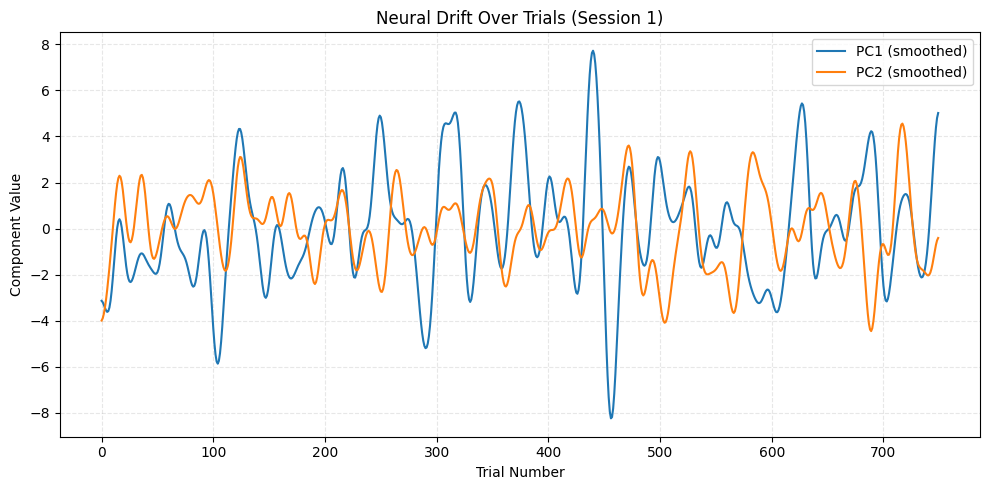

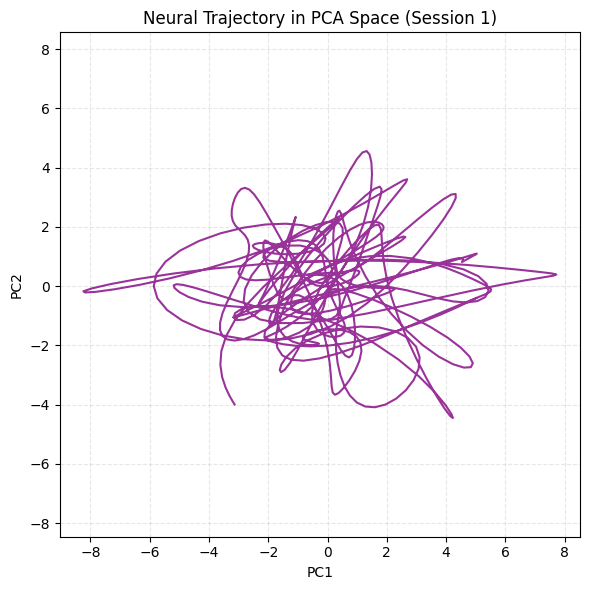

In [ ]:
# Example: load PCA result for session 1
session_number = 1
session_pca_matrix = shared_pca_sessions[session_number]  # shape [750, n_components]
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
import numpy as np

# Smooth PC1 and PC2
smoothed_pc1 = gaussian_filter1d(session_pca_matrix[:, 0], sigma=5)
smoothed_pc2 = gaussian_filter1d(session_pca_matrix[:, 1], sigma=5)

# Plot drift over trials
plt.figure(figsize=(10, 5))
plt.plot(smoothed_pc1, label='PC1 (smoothed)')
plt.plot(smoothed_pc2, label='PC2 (smoothed)')
plt.title(f"Neural Drift Over Trials (Session {session_number})")
plt.xlabel("Trial Number")
plt.ylabel("Component Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: 2D trajectory plot
plt.figure(figsize=(6, 6))
plt.plot(smoothed_pc1, smoothed_pc2, alpha=0.8, color='purple')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Neural Trajectory in PCA Space (Session {session_number})")
plt.grid(True, linestyle='--', alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

def plot_lag_similarity_by_iscorrect2(fmri_indices, value_prefix="pca_correlation_lag_", window=3):
    """
    Plots neural similarity vs. encoding lag (-window to +window), split by ISCORRECT2.

    Parameters:
    - fmri_indices: DataFrame with correlation values and ISCORRECT2 column (0 or 1)
    - value_prefix: Prefix for correlation columns (default: 'pca_correlation_lag_')
    - window: range of lags to consider (±window)
    """
    lags = list(range(-window, window + 1))

    iscorrect_groups = fmri_indices.groupby('ISCORRECT2')

    plt.figure(figsize=(8, 5))

    for correct_value, group in iscorrect_groups:
        mean_vals = []
        sem_vals = []

        for lag in lags:
            col = f"{value_prefix}{lag}"
            if col in group.columns:
                values = group[col].dropna()
                mean_vals.append(np.mean(values))
                sem_vals.append(sem(values) if len(values) > 1 else 0)
            else:
                mean_vals.append(np.nan)
                sem_vals.append(0)

        label = f"ISCORRECT2 = {int(correct_value)}"
        plt.errorbar(lags, mean_vals, yerr=sem_vals, label=label, capsize=4, marker='o', linestyle='-')

    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.xlabel("Lag at Encoding (relative to 1A)")
    plt.ylabel("Neural Cosine Similarity (PCA space)")
    plt.title("Similarity vs. Lag (Split by ISCORRECT2)")
    plt.legend(title="Second Image Correct?")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_lag_similarity_by_iscorrect2(fmri_indices_updated)

NameError: name 'fmri_indices_updated' is not defined

In [ ]:
def melt_similarity_by_lag(fmri_indices, window=3, value_prefix="pca_correlation_lag_"):
    """
    Converts wide-format similarity DataFrame into long format for modeling.

    Returns:
    - DataFrame with columns: ['Lag', 'CosineSimilarity', 'ISCORRECT2', ...]
    """
    melted = []

    for lag in range(-window, window + 1):
        col = f"{value_prefix}{lag}"
        if col not in fmri_indices:
            continue

        subset = fmri_indices[['ISCORRECT2']].copy()
        subset['Lag'] = lag
        subset['CosineSimilarity'] = fmri_indices[col]

        # Optional: include Subject if you have it
        if 'Subject' in fmri_indices.columns:
            subset['Subject'] = fmri_indices['Subject']

        melted.append(subset)

    return pd.concat(melted, ignore_index=True)
long_df = melt_similarity_by_lag(fmri_indices_updated, window=3)
long_df.head()


,ISCORRECT2,Lag,CosineSimilarity
0,1.0,-3,-0.408796
1,1.0,-3,-0.296803
2,1.0,-3,-0.056091
3,1.0,-3,-0.327033
4,1.0,-3,-0.627120


In [ ]:
import statsmodels.formula.api as smf

# Drop missing values
df_model = long_df.dropna()

subset_df_model = df_model[df_model['Lag']<=0]

# Simple model: similarity ~ lag
model = smf.ols("CosineSimilarity ~ Lag", data=subset_df_model).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       CosineSimilarity   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           6.21e-26
Time:                        21:16:18   Log-Likelihood:                -6472.3
No. Observations:               19508   AIC:                         1.295e+04
Df Residuals:                   19506   BIC:                         1.296e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0447      0.004     11.067      0.0

In [ ]:
model = smf.ols("CosineSimilarity ~ Lag * ISCORRECT2", data=subset_df_model).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       CosineSimilarity   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     38.90
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           4.72e-25
Time:                        21:16:59   Log-Likelihood:                -6469.6
No. Observations:               19508   AIC:                         1.295e+04
Df Residuals:                   19504   BIC:                         1.298e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0424      0.013      3.

In [ ]:
fmri_indices = compare_second_occurrence_to_neighbors_pca(fmri_indices, all_mtl_sessions_pca)

In [ ]:
filtered_df = fmri_indices[fmri_indices["SESSION2"]==2]
filtered_df = filtered_df[filtered_df["session_diff"]==1]
filtered_df = filtered_df[filtered_df["ISCORRECT2"]==1]
mean_correlation = filtered_df['roi_correlation_lag_0'].mean()
print(f"Mean correlation (iscorrect2 == 0): {mean_correlation}")
print(filtered_df.shape)
# print(filtered_df)

Mean correlation (iscorrect2 == 0): 0.14028273418094464
(25, 18)


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

def prepare_fmri_data(fmri_df):
    """
    Reshapes fmri_indices to a long format suitable for modeling similarity vs. LAG.

    Parameters:
    - fmri_df (pd.DataFrame): DataFrame containing fmri indices

    Returns:
    - reshaped DataFrame ready for modeling
    """
    # Select columns for roi_correlation values (those with "roi_correlation_lag_")
    correlation_cols = [col for col in fmri_df.columns if "roi_correlation_lag_" in col]

    # Melt DataFrame to get long format with LAG and correlation
    long_df = fmri_df.melt(id_vars=['ISCORRECT2', 'SESSION1'], value_vars=correlation_cols,
                            var_name='LAG', value_name='roi_correlation')

    # Extract LAG values from column names
    long_df['LAG'] = long_df['LAG'].str.extract(r'roi_correlation_lag_(-?\d+)').astype(int)

    return long_df

# Prepare data
long_fmri_df = prepare_fmri_data(fmri_indices[fmri_indices["session_diff"]==1])


In [ ]:
print(long_fmri_df)
print(long_fmri_df["SESSION1"].isna().sum())  # Should be 0
print(long_fmri_df["SESSION1"].unique())  # Should match original sessions (1 to 40)
long_fmri_df = long_fmri_df.reset_index(drop=True)
print(long_fmri_df.shape)  # Should match the last index value
print(long_fmri_df.index.max())  # Should be one less than shape[0]
print(long_fmri_df["SESSION1"].isna().sum())  # Should be 0
long_fmri_df["SESSION1"] = long_fmri_df["SESSION1"].astype("category")
session_counts = long_fmri_df["SESSION1"].value_counts()
print(long_fmri_df["SESSION1"].value_counts())
print(session_counts.min())  # Should be >1
print("Unique sessions in DataFrame:", long_fmri_df["SESSION1"].nunique())
print("Unique sessions in Model Groups:", len(long_fmri_df["SESSION1"].unique()))



     ISCORRECT2 SESSION1  LAG  roi_correlation
0           0.0        1   -3         0.094816
1           1.0        1   -3        -0.091082
2           0.0        1   -3         0.104167
3           0.0        1   -3        -0.413122
4           0.0        1   -3        -0.404404
...         ...      ...  ...              ...
9781        1.0       39    3         0.233168
9782        1.0       39    3         0.377460
9783        1.0       39    3         0.079037
9784        1.0       39    3        -0.473035
9785        1.0       39    3         0.237218

[9786 rows x 4 columns]
0
[1, 2, 3, 4, 5, ..., 35, 36, 37, 38, 39]
Length: 39
Categories (39, int64): [1, 2, 3, 4, ..., 36, 37, 38, 39]
(9786, 4)
9785
0
SESSION1
4     448
1     441
13    406
15    371
2     364
16    350
8     336
3     329
11    329
10    322
6     315
7     315
21    308
14    301
9     294
22    294
17    280
20    273
5     273
18    273
19    231
28    231
25    231
24    224
26    224
12    203
23    203
29 

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming df is the reshaped dataframe
# Convert ISCORRECT2 to categorical if not already
long_fmri_df['ISCORRECT2'] = long_fmri_df['ISCORRECT2'].astype('category')


print(session_counts.min())  # Should be >1 for all groups

# test_model = smf.ols("roi_correlation ~ LAG * ISCORRECT2", data=long_fmri_df).fit()
# print(test_model.summary())
model = smf.mixedlm(
    "roi_correlation ~ LAG * ISCORRECT2",  # Interaction model
    long_fmri_df,
    groups="SESSION1",  # Random intercept for session
)
result = model.fit()
print(result.summary())


9785 9786
91


IndexError: index 9706 is out of bounds for axis 0 with size 9706

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_similarity_vs_lag_all_sessions(fmri_df):
    """
    Plots mean similarity vs. lag separately for ISCORRECT2 = 1 and ISCORRECT2 = 0,
    disconnecting the line at lag = 0, aggregated across all sessions.

    Parameters:
    - fmri_df (pd.DataFrame): DataFrame containing correlation values for different lags.
    """
    # Define lags and corresponding column names
    lags = np.arange(-3, 4)
    lag_columns = [f'roi_correlation_lag_{lag}' for lag in lags]

    # Check if ISCORRECT2 exists
    if 'ISCORRECT2' not in fmri_df.columns:
        print("Error: 'ISCORRECT2' column is missing. Available columns:", fmri_df.columns)
        return

    # Filter valid rows
    fmri_df = fmri_df.dropna(subset=['ISCORRECT2'])
    fmri_df = fmri_df[fmri_df['ISCORRECT2'].isin([0, 1])]

    if fmri_df.empty:
        print("No valid data found after filtering. Check input DataFrame.")
        return

    # Separate correct and incorrect trials
    correct_mask = fmri_df['ISCORRECT2'] == 1
    incorrect_mask = fmri_df['ISCORRECT2'] == 0

    correct_means = [fmri_df.loc[correct_mask, col].mean(skipna=True) for col in lag_columns]
    incorrect_means = [fmri_df.loc[incorrect_mask, col].mean(skipna=True) for col in lag_columns]

    # Separate lags into negative, zero, and positive
    neg_lags = lags[lags < 0]
    pos_lags = lags[lags > 0]

    neg_correct = correct_means[:3]
    pos_correct = correct_means[4:]

    neg_incorrect = incorrect_means[:3]
    pos_incorrect = incorrect_means[4:]

    # Plot
    plt.figure(figsize=(8, 5))

    # Plot lines separately for negative and positive lags (to disconnect at lag=0)
    plt.plot(neg_lags, neg_correct, marker='o', linestyle='-', color='b', label='ISCORRECT2 = 1')
    plt.plot(pos_lags, pos_correct, marker='o', linestyle='-', color='b')

    plt.plot(neg_lags, neg_incorrect, marker='o', linestyle=':', color='r', alpha=0.6, label='ISCORRECT2 = 0')
    plt.plot(pos_lags, pos_incorrect, marker='o', linestyle=':', color='r', alpha=0.6)

    # Scatter plot for lag = 0 (disconnected point)
    plt.scatter(0, correct_means[3], color='b', marker='o')
    plt.scatter(0, incorrect_means[3], color='r', marker='o')

    plt.xlabel("Lag (Trials Apart)")
    plt.ylabel("Mean Similarity")
    plt.title("Similarity vs. Lag (Averaged Across Sessions)")
    plt.legend()
    plt.grid(True)
    plt.show()


       INDEX1  SESSION1  ISCORRECT1  SESSIONINDEX1  RUNINDEX1  INDEX2  \
0        16.0         1         1.0           17.0          1      45   
1        64.0         1         1.0           65.0          2      68   
2        44.0         1         1.0           45.0          1      90   
3        65.0         1        -1.0           66.0          2     107   
4       105.0         1         1.0          106.0          2     121   
...       ...       ...         ...            ...        ...     ...   
4880  29770.0        40         0.0          521.0          9   29795   
4881  29588.0        40         0.0          339.0          6   29805   
4882  29773.0        40         0.0          524.0          9   29825   
4883  29390.0        40         0.0          141.0          3   29830   
4884  29718.0        40         0.0          469.0          8   29919   

      SESSION2  ISCORRECT2  SESSIONINDEX2  RUNINDEX2  session_diff  \
0            1         1.0           46.0        1.0 

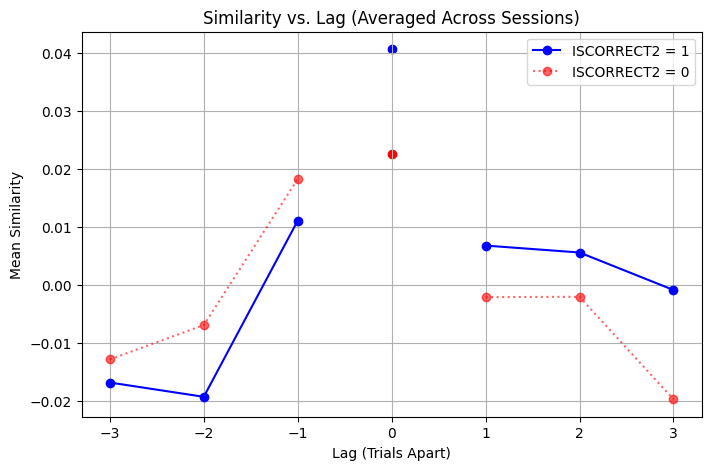

In [ ]:
print(fmri_indices)
plot_similarity_vs_lag_all_sessions(fmri_indices)


In [ ]:
roi_betas_list = []
for roi in {2}:
    if roi in all_mtl_sessions[1]:
        roi_betas = all_mtl_sessions[1][roi][50 - 1]
        print(f"ROI {roi} shape before flattening: {roi_betas.shape}")
        roi_betas_list.append(roi_betas.flatten())

beta_roi_s1 = np.concatenate(roi_betas_list, axis=0)
print(f"Final beta_roi_s1 shape: {beta_roi_s1.shape}")

ROI 2 shape before flattening: (241,)
Final beta_roi_s1 shape: (241,)


In [ ]:
mean_correlation = filtered_df['roi_correlation_lag_0'].mean()


ValueError: n_components=15 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [ ]:
print(fmri_indices.shape)

(4885, 18)
